##### Copyright 2020 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# The Sequential model

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/guide/keras/sequential_model"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/snapshot-keras/site/en/guide/keras/sequential_model.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/keras-team/keras-io/blob/master/guides/sequential_model.py"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/guide/keras/sequential_model.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Setup

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Cuando usar un modelo secuencial

Un modelo Sequential es apropiado para una **pila simple de capas** donde **cada capa** tiene exactamente un **tensor de entrada y un tensor de salida .**

Esquemáticamente, el siguiente modelo Sequential :

In [ ]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
y = model(x)

es equivalente a:

In [ ]:
# Create 3 layers
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")

# Call layers on a test input
x = tf.ones((3, 3))
y = layer3(layer2(layer1(x)))

A Sequential model is **not appropriate** when:

- Your model has multiple inputs or multiple outputs
- Any of your layers has multiple inputs or multiple outputs
- You need to do layer sharing
- You want non-linear topology (e.g. a residual connection, a multi-branch
model)

## Creating a Sequential model

You can create a Sequential model by passing a list of layers to the Sequential
constructor:

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)

Its layers are accessible via the `layers` attribute:

In [ ]:
model.layers

Es equivalente utilizar cualquiera de las dos formas

You can also create a Sequential model incrementally via the `add()` method:

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))

Note that there's also a corresponding `pop()` method to remove layers:
a Sequential model behaves very much like a list of layers.

In [ ]:
model.pop()
print(len(model.layers))  # 2

2


También tenga en cuenta que el constructor secuencial acepta un argumento `name`, como cualquier capa o modelo en Keras. Esto es útil para anotar gráficos de TensorBoard con nombres semánticamente significativos.

Sobre todo cuando tenemos modelos más complejos


In [ ]:
model = keras.Sequential(name="my_sequential")
model.add(layers.Dense(2, activation="relu", name="layer1"))
model.add(layers.Dense(3, activation="relu", name="layer2"))
model.add(layers.Dense(4, name="layer3"))

# Especificar la forma de entrada de antemano

Generalmente, todas las capas en Keras necesitan conocer la forma de sus entradas para poder crear sus pesos. Cuando se crea una capa como hemos visto así, inicialmente no tiene pesos y devuelve vacío porque no hay entradas:

In [ ]:
layer = layers.Dense(3)
layer.weights  # Empty

[]

Vamos a crear los pesos la primera vez que se llama en una entrada, ya que la forma de los pesos depende de la forma de las entradas:

In [ ]:
# Call layer on a test input
x = tf.ones((1, 4))
y = layer(x)
layer.weights  # Now it has weights, of shape (4, 3) and (3,)

[<tf.Variable 'dense_3/kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[ 0.8908918 ,  0.86334014,  0.83595514],
        [ 0.783913  ,  0.34656405, -0.23635906],
        [ 0.18708086, -0.7805959 ,  0.15301478],
        [-0.8627786 , -0.08354247, -0.3565396 ]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [ ]:
print(x.shape)
print(layer.weights)
print(y.shape)

(1, 4)
[<tf.Variable 'dense_3/kernel:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.8908918 ,  0.86334014,  0.83595514],
       [ 0.783913  ,  0.34656405, -0.23635906],
       [ 0.18708086, -0.7805959 ,  0.15301478],
       [-0.8627786 , -0.08354247, -0.3565396 ]], dtype=float32)>, <tf.Variable 'dense_3/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]
(1, 3)


Esto también se aplica a los modelos secuenciales. Cuando crea una instancia de un modelo secuencial sin una forma de entrada, no está "construido": no tiene pesos (y llamar a `model.weights` da un error que indica solo esto). Los pesos se crean cuando el modelo ve por primera vez algunos datos de entrada:



In [ ]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)  # No weights at this stage!

# At this point, you can't do this:
#model.weights

# You also can't do this:
# model.summary()

# podemos probar a comentar lo siguiente y dará error porque el modelo aún no está construido
# Call the model on a test input
x = tf.ones((1, 4))
y = model(x)
print("Number of weights after calling the model:", len(model.weights))  # 6

Number of weights after calling the model: 6


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (1, 2)                    10        
_________________________________________________________________
dense_5 (Dense)              (1, 3)                    9         
_________________________________________________________________
dense_6 (Dense)              (1, 4)                    16        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


Once a model is "built", you can call its `summary()` method to display its
contents:

este es uno de los puntos que veo más interesante para ver el modelo

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (1, 2)                    10        
_________________________________________________________________
dense_12 (Dense)             (1, 3)                    9         
_________________________________________________________________
dense_13 (Dense)             (1, 4)                    16        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


Se puede mostar el modelo como un gráfico con los valores de la entrada y la salida de cada capa:

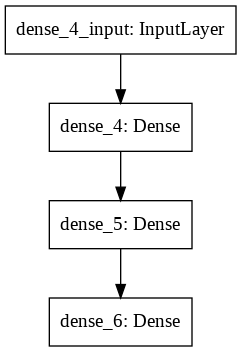

In [ ]:
keras.utils.plot_model(model, 'model.png', show_shapes=False)

puede ser muy útil cuando se crea un modelo secuencial de forma incremental para poder mostrar el resumen del modelo hasta el momento, incluida la forma de salida actual. En este caso, debe comenzar su modelo pasando un objeto de `Input` a su modelo, para que conozca su forma de entrada desde el principio:

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(4,)))
model.add(layers.Dense(2, activation="relu"))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 2)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


Note that the `Input` object is not displayed as part of `model.layers`, since
it isn't a layer:

In [ ]:
model.layers

A simple alternative is to just pass an `input_shape` argument to your first
layer:

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu", input_shape=(4,)))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 2)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


Los modelos construidos con una forma de entrada predefinida como esta siempre tienen pesos (incluso antes de ver cualquier dato) y siempre tienen una forma de salida definida.

En general, es una práctica recomendada especificar siempre la forma de entrada de un modelo secuencial de antemano si sabe cuál es.

Yo también lo **recomiendo**

## A common debugging workflow: `add()` + `summary()`

When building a new Sequential architecture, it's useful to incrementally stack
layers with `add()` and frequently print model summaries. For instance, this
enables you to monitor how a stack of `Conv2D` and `MaxPooling2D` layers is
downsampling image feature maps:

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(250, 250, 3)))  # 250x250 RGB images
model.add(layers.Conv2D(32, 5, strides=2, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))

# Can you guess what the current output shape is at this point? Probably not.
# Let's just print it:
print(model.summary())

# The answer was: (40, 40, 32), so we can keep downsampling...

model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(2))

# And now?
model.summary()

# Now that we have 4x4 feature maps, time to apply global max pooling.
model.add(layers.GlobalMaxPooling2D())

# Finally, we add a classification layer.
model.add(layers.Dense(10))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 123, 123, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 121, 121, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 32)        0         
Total params: 11,680
Trainable params: 11,680
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 123, 123, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 121, 121, 32)      9248      
_____________________

Very practical, right?


Lo interesante que hacemos con el modelo

estos dos últimos puntos los veremos más adelante

## Qué se puede hacer una vez que tenemos un modelo

Once your model architecture is ready, you will want to:

- Train your model, evaluate it, and run inference. See our
[guide to training & evaluation with the built-in loops](
https://www.tensorflow.org/guide/keras/train_and_evaluate/)
- Save your model to disk and restore it. See our
[guide to serialization & saving](https://www.tensorflow.org/guide/keras/save_and_serialize/).
- Speed up model training by leveraging multiple GPUs. See our
[guide to multi-GPU and distributed training](https://keras.io/guides/distributed_training/).

## Extracción de características con un modelo secuencial

Una vez que se ha creado un modelo secuencial, se comporta como un modelo de API funcional [Functional API
model](https://www.tensorflow.org/guide/keras/functional/). 

Esto significa que cada capa tiene un atributo de `input` y `output` . Estos atributos se pueden usar para hacer cosas interesantes, como crear rápidamente un modelo que extrae los resultados de todas las capas intermedias en un modelo secuencial:

Además esta será la vase para nuestro punto siguiente y último de **trasferencia del aprendizaje**, qué nombre tan bonito ;-)

In [ ]:
initial_model = keras.Sequential(
    [
        keras.Input(shape=(250, 250, 3)),
        layers.Conv2D(32, 5, strides=2, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
    ]
)
feature_extractor = keras.Model(
    inputs=initial_model.inputs,
    outputs=[layer.output for layer in initial_model.layers],
)

# Call feature extractor on test input.
x = tf.ones((1, 250, 250, 3))
features = feature_extractor(x)

In [ ]:
features

In [ ]:
print(features[0])
initial_model.summary()

Here's a similar example that only extract features from one layer:

In [ ]:
initial_model = keras.Sequential(
    [
        keras.Input(shape=(250, 250, 3)),
        layers.Conv2D(32, 5, strides=2, activation="relu"),
        layers.Conv2D(32, 3, activation="relu", name="my_intermediate_layer"),
        layers.Conv2D(32, 3, activation="relu"),
    ]
)
feature_extractor = keras.Model(
    inputs=initial_model.inputs,
    outputs=initial_model.get_layer(name="my_intermediate_layer").output,
)
# Call feature extractor on test input.
x = tf.ones((1, 250, 250, 3))
features = feature_extractor(x)

In [ ]:
initial_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 123, 123, 32)      2432      
_________________________________________________________________
my_intermediate_layer (Conv2 (None, 121, 121, 32)      9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 119, 119, 32)      9248      
Total params: 20,928
Trainable params: 20,928
Non-trainable params: 0
_________________________________________________________________


In [ ]:
features.shape

TensorShape([1, 121, 121, 32])

## Transferir el aprendizaje con un modelo secuencial

El aprendizaje por transferencia consiste en congelar las capas inferiores en un modelo y solo entrenar las capas superiores. Si no está familiarizado con él, asegúrese de leer nuestra guía para transferir el aprendizaje [guide to transfer learning](https://www.tensorflow.org/guide/keras/transfer_learning/)..

Aquí hay dos planos comunes de aprendizaje por transferencia que involucran modelos secuenciales.

Primero, digamos que tiene un modelo secuencial y desea congelar todas las capas excepto la última. En este caso, simplemente iteraremos sobre `model.layers` y establecemos `layer.trainable = False` en cada capa, excepto en la última. Como esto:

```python
model = keras.Sequential([
    keras.Input(shape=(784))
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10),
])

# Presumably you would want to first load pre-trained weights.
model.load_weights(...)

# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

# Recompile and train (this will only update the weights of the last layer).
model.compile(...)
model.fit(...)
```

Otro plan común es utilizar un modelo secuencial para apilar un modelo previamente entrenado y algunas capas de clasificación recién inicializadas. Como esto:

Este es el que considero más **recomendable**, también porque es el que más he usado

```python
# Load a convolutional base with pre-trained weights
base_model = keras.applications.Xception(
    weights='imagenet',
    include_top=False,
    pooling='avg')

# Freeze the base model
base_model.trainable = False

# Use a Sequential model to add a trainable classifier on top
model = keras.Sequential([
    base_model,
    layers.Dense(1000),
])

# Compile & train
model.compile(...)
model.fit(...)
```

If you do transfer learning, you will probably find yourself frequently using
these two patterns.

Otro muy buen sitio de referencia para aprender sobre el Data Augmentation y Transfer Learning

https://torres.ai/data-augmentation-y-transfer-learning-en-keras-tensorflow/

That's about all you need to know about Sequential models!

To find out more about building models in Keras, see:

- [Guide to the Functional API](https://www.tensorflow.org/guide/keras/functional/)
- [Guide to making new Layers & Models via subclassing](
https://www.tensorflow.org/guide/keras/custom_layers_and_models/)